In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df_teachers = pd.read_csv("public FQV_V_list_of_teachers.csv", sep="~")
df_discipline = pd.read_csv("public FQV_V_list_of_discipline.csv", sep="~")
df_oup = pd.read_csv("public FQV_V_list_of_OUP.csv", sep="~")

Давайте попробуем посмотерть по годам посещаемость каждой дисциплины:

У нас все дисциплины уникальные!!! Их 17972.

Размер каждой таблицы:

df_oup         20873

df_discipline  17972

df_teachers    55687

In [3]:
df_teachers

,CustomPlanItem,Teacher,LastName,FirstName,MiddleName,WorkerCode,DepWorkerCode,Position,PositionCategory,TeacherDepartment_D,RegDepartment_D,MailList,CustomPlanCell_D,TakesExam,sum
0,2856872745,2667340806,Вакансия,-,-,None,None,Преподаватель,76487616,кафедра управления информационными системами и...,Москва,None,Количество лекционных часов,0.0,32.0
1,2856872745,2667340806,Вакансия,-,-,None,None,Преподаватель,76487616,кафедра управления информационными системами и...,Москва,None,Количество часов на текущий контроль и экзамен,1.0,36.0
2,2856872745,2667340806,Вакансия,-,-,None,None,Преподаватель,76487616,кафедра управления информационными системами и...,Москва,None,Количество часов семинаров,0.0,40.0
3,2858757910,2892896684,Вакансия,ИК,-,None,None,None,76487616,Школа коммуникаций,Москва,None,Количество лекционных часов,0.0,0.0
4,2858757910,2892896684,Вакансия,ИК,-,None,None,None,76487616,Школа коммуникаций,Москва,None,Количество часов на текущий контроль и экзамен,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55682,4506809443,878880149,Файер,Владимир,Владимирович,7014,02.28.12-770660548-624,Доцент,76484071,Школа лингвистики,Москва,vvfire@hse.ru,Количество часов на текущий контроль и экзамен,1.0,11.0
55683,4506809677,4376170361,Поселягин,Николай,Владимирович,7748648,02.28.24-770048648-624,Доцент,76484071,Школа филологических наук,Москва,nposelyagin@hse.ru,Количество часов на текущий контроль и экзамен,1.0,10.0
55684,4509552443,4379166962,Манин,Александр,Владимирович,7733855,02.38.33-770033855-624,Доцент,76484071,департамент маркетинга,Москва,amanin@hse.ru,Количество часов на текущий контроль и экзамен,1.0,39.0
55685,4509774481,4376159265,Кукулин,Илья,Владимирович,4766,02.28.24-16232,Доцент,76484071,Школа филологических наук,Москва,ikukulin@hse.ru,Количество часов на текущий контроль и экзамен,1.0,8.0


Мысль - пойти на https://www.hse.ru/edu/courses и добавить от туда язык чтения курса.

In [4]:
dd = df_oup.groupby(by=df_oup["ProposalItem"]).count()[["ID"]]

In [5]:
dd[dd["ID"] > 2]

,ID
ProposalItem,
1685415853,9
1685423790,9
1723905205,7
1723905213,7
2011643261,6
...,...
4560319132,4
5134880058,3
5253642953,6


Есть дисциплины, для которых не обозначено ожидаемое число студентов (StudCount)

df_oup[df_oup["StudCount"] == "None"]

Думаем, что с ними делать:

Хотим сделать df_oup["StudCount"].astype("int")

In [6]:
df_oup[(df_oup["StudCount"] == "None")]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,RegDepartment_D,Faculty_D,LearnProgram_D
460,1434158830,1521712779,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,None,16,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
461,1434158852,1521712832,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,None,16,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
462,1434158864,1521712858,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,None,16,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
463,1434158875,1521712884,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,None,16,16,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок
502,1506494153,1521711582,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,None,10,10,0,Москва,Международный центр подготовки кадров в област...,Управление логистикой и цепями поставок (з)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,6567746669,None,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,None,4,0,4,Москва,Институт образования,Управление образованием
19496,6567747027,None,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,None,4,0,4,Москва,Институт образования,Управление образованием
19497,6565202616,6542850276,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,None,5,0,5,Москва,Институт образования,Управление образованием
19498,6565203399,6542850374,Объединенный учебный план,Магистратура,Магистратура 1 курс,2020/2021 учебный год,None,3,0,3,Москва,Институт образования,Управление образованием


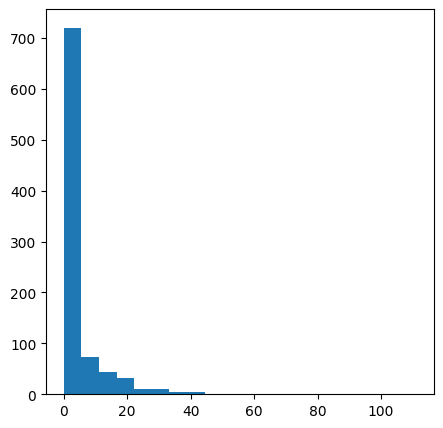

In [5]:
plt.figure(figsize=(5, 5))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
a = df_oup[(df_oup["StudCount"] == "None") & (df_oup["StudLearnCount"] != "None")]["StudLearnCount"]
# labels = df_oup[df_oup["StudCount"] == "None"]["StudLearnCount"].unique()
# labels = np.sort(labels)
plt.hist(list(map(int, a)), bins=20)
plt.show()
# labels

In [75]:
set(df_discipline["Description"].unique())

{'Информационный поиск и обработка текстов на естественном языке',
 'Городская антропология',
 'Теория финансов',
 'Российская внешняя политика в контексте Украинского кризиса',
 'Культурология',
 'Mеждународный маркетинг',
 'Низкоразмерные электронные системы',
 'Научно-исследовательский семинар "Интегрированные системы в логистике и управлении цепями поставок"',
 'Научно-исследовательский семинар "Новая культурная история"',
 'Распределенные системы',
 'Теория коммуникации: объединение науки и практики',
 'Корейское экономическое развитие',
 'История русской литературы',
 'Основы управления городской инфраструктурой',
 'Цифровые технологии в сфере юриспруденции',
 'Введение в дополненную реальность и ARCore',
 'Теория отраслевых рынков: стратегия и конкуренция в бизнесе',
 "Let's Rock: проблемы исследования британской популярной музыки",
 'Таможенные процедуры при осуществлении внешнеторговой деятельности',
 'Теория и типология мирового фольклора',
 'Когнитивные процессы',
 'Письменн

План, как над этим работать:

1) Изучить таблицы, немного понять физику всего этого
2) Сделать гипотезы, какие факторы влияют на посещаемость курса
3) Проверить их
4) Дальше повторяем шаги 2-3, стараемся проанализировать все параметры

Гарри Поттер бы сказал, что план плохой, но пока сойдет.

В итоге будет два вида курсов - те, которые раньше встречались, и раньше не встречались. Для первых мы хотим проанализировать предыдущие года, количество мест и заполняемость, чтобы построить прогноз. Для второй группы, мы хотим как-то оценить востребованность курса.

Идейно мы также хотим выделить основные факторы, влияющие на успешность курса.

Из того, что может также понадобиться, но чего нет в данных:

* язык курса (это точно можно получить с сайта https://www.hse.ru/edu/courses/)
* оценки (непонятно, можно ли это получить вообще).

Теперь перейдем к тому, что в данных есть, и как мы собрались это анализировать. 

В качестве показателя хорошести будем считать разницу StudLearnCount и StudCount. В идеале этот параметр должен быть около нуля. Если он большой, значит надо бы увеличить количетсво мест на курсе, если маленький - уменьшить или вообще закрыть.

Теперь непосредственно о модели. В качестве метрики возьмем то, что написано выше + как-то модифицируем. Осталось разобраться, как собственно построить модель.

Начнем работу с простой линейной регрессии. 

Сначала разберемся, что делать с одинаковыми курсами. Или построить первую модель без них, чисто на признаки посмотреть?

In [3]:
df_oup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20873 entries, 0 to 20872
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               20873 non-null  int64 
 1   ProposalItem     20873 non-null  object
 2   PlanClass_D      20873 non-null  object
 3   EdLevel_D        20873 non-null  object
 4   ItemCourse_D     20873 non-null  object
 5   ItemLearnYear_D  20873 non-null  object
 6   StudCount        20873 non-null  object
 7   StudLearnCount   20873 non-null  object
 8   BachStudCount    20873 non-null  int64 
 9   MagStudCount     20873 non-null  int64 
 10  RegDepartment_D  20873 non-null  object
 11  Faculty_D        20873 non-null  object
 12  LearnProgram_D   20873 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.1+ MB


In [4]:
df_oup["ID"].astype('int')

0        2841075702
1        2841080394
2        2841083512
3        2841086181
4        2841143136
            ...    
20868    4502475287
20869    4504446723
20870    4504447639
20871    4505861343
20872    4505861347
Name: ID, Length: 20873, dtype: int64

In [8]:
df_oup.nunique()

ID                 20873
ProposalItem       17973
PlanClass_D            5
EdLevel_D              5
ItemCourse_D          11
ItemLearnYear_D        3
StudCount            272
StudLearnCount       376
BachStudCount        372
MagStudCount         127
RegDepartment_D        5
Faculty_D             53
LearnProgram_D       317
dtype: int64

In [115]:
dd = df_oup.groupby(by=["ProposalItem", "ItemLearnYear_D"]).count()[["ID"]]
dd[dd["ID"] > 2]

,,ID
ProposalItem,ItemLearnYear_D,
1685415853,2019/2020 учебный год,9
1685423790,2020/2021 учебный год,9
1723905205,2019/2020 учебный год,7
1723905213,2020/2021 учебный год,7
2011643261,2019/2020 учебный год,6
...,...,...
5253642953,2021/2022 учебный год,6
5375583325,2021/2022 учебный год,6
None,2019/2020 учебный год,164


In [117]:
df_discipline.nunique()

Description           7500
LongName              7502
SubjectClass_D           2
FacDepartment_D        215
FDFaculty_D             53
FDRegDepartment_D        4
ID                   17972
MasterItem           17276
MasterItemPos        17208
ItemSource_D             4
AudienceScope_D          4
Credits                 25
EntireHours             31
LectionHours            60
SeminarHours            75
PracticeHours          115
PeriodNumList           18
WithOnlineCourse         2
ItemLearnYear_D          3
dtype: int64

In [5]:
df_oup = df_oup.drop(df_oup[df_oup["StudCount"] == "None"].index)

In [6]:
df_oup = df_oup.drop(df_oup[df_oup["StudLearnCount"] == "None"].index)

In [7]:
df_oup = df_oup.drop(df_oup[df_oup["ProposalItem"] == "None"].index)

Хотим заменить в столбце "Credits" все значения None на 0 (это и правда дисциплины без веса):

In [8]:
df_discipline.loc[df_discipline["Credits"] == "None", "Credits"] = 0
df_discipline.loc[df_discipline["LectionHours"] == "None", "LectionHours"] = 0
df_discipline.loc[df_discipline["SeminarHours"] == "None", "SeminarHours"] = 0
df_discipline.loc[df_discipline["PracticeHours"] == "None", "PracticeHours"] = 0
df_discipline.loc[df_discipline["EntireHours"] == "None", "EntireHours"] = 0

In [9]:
df_oup = df_oup.astype({"StudCount": 'int',
                        "StudLearnCount": 'int', 
                        "ProposalItem": 'int'})
df_discipline = df_discipline.astype({"Credits": 'int',
                                      "LectionHours": 'int',
                                      "SeminarHours": 'int',
                                      "PracticeHours": 'int',
                                      "EntireHours": 'int'})

In [10]:
df = df_oup.join(df_discipline.set_index("ID"), on="ProposalItem",  rsuffix='_discipline')
df

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline
0,2841075702,2865810374,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,33,33,0,...,Средства университета,None,3,114,18,20,0,1,Нет,2019/2020 учебный год
1,2841080394,2865810719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,Средства университета,None,3,114,18,20,0,1,Нет,2019/2020 учебный год
2,2841083512,2865811719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,29,29,0,...,Средства университета,None,3,114,18,20,0,1,Нет,2019/2020 учебный год
3,2841086181,2865811996,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,31,31,0,...,Средства университета,None,3,114,18,20,0,1,Нет,2019/2020 учебный год
4,2841143136,2865843661,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,Средства университета,None,3,114,18,20,0,3,Нет,2019/2020 учебный год
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20868,4502475287,4466805473,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,7,0,7,...,Средства университета,для своего кампуса,6,228,38,38,0,"3, 4",Нет,2021/2022 учебный год
20869,4504446723,4449156989,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,29,0,29,...,Средства университета,для своего кампуса,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год
20870,4504447639,4449156466,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,20,0,20,...,Средства университета,для своего кампуса,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год
20871,4505861343,4505861336,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,1,0,1,...,Средства университета,для своего кампуса,3,114,20,20,0,3,Нет,2021/2022 учебный год


In [15]:
%store df

Stored 'df' (DataFrame)


Давайте попробуем простую линейную регрессию!

## С этого момента все эксперименты выносятся в ноутбук Models, здесь остается только изучение данных.

Давайте попробуем поиспользовать Credits и PracticeHours, но для этого надо решить, что делать с проблеми ("None").
Для Credits проблема решена выше - заменили на 0 (это в основном физкультура, логично, что она не имеет веса).
Предлагаю для PracticeHours и тд тоже заменить на 0 и потестить.

Может разделить курсы на большие и маленькие?

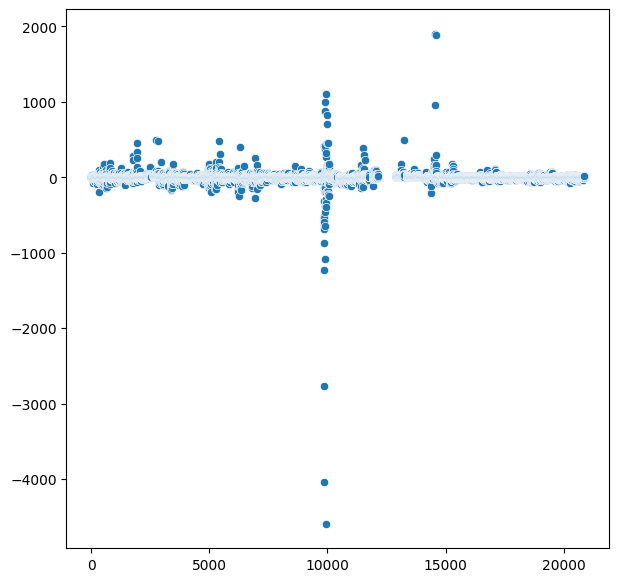

In [17]:
diff = df["StudCount"] - df["StudLearnCount"]
plt.figure(figsize=(7, 7))
sns.scatterplot(diff)
plt.show()

In [ ]:
df["Description"]

In [23]:
df[df["StudCount"] - df["StudLearnCount"] < -1000][["Description", "StudCount", "StudLearnCount"]]

,Description,StudCount,StudLearnCount
9853,Английский язык,0,1226
9859,Английский язык,500,4532
9860,Английский язык,400,3171
9915,Английский язык для общих коммуникативных целе...,821,1904
9941,Английский язык,1,4592


Видно, что самые большие дельты у Английского языка(в том или ином виде). Давайте попробуем добавить факультет:

In [373]:
base_regression(["StudCount", "Credits"], ["Description"], no_coef=True)

RMSE:
32.30016017583393 



Давайте посмотрим на scatter Credits от StudCount или что-то подобное.

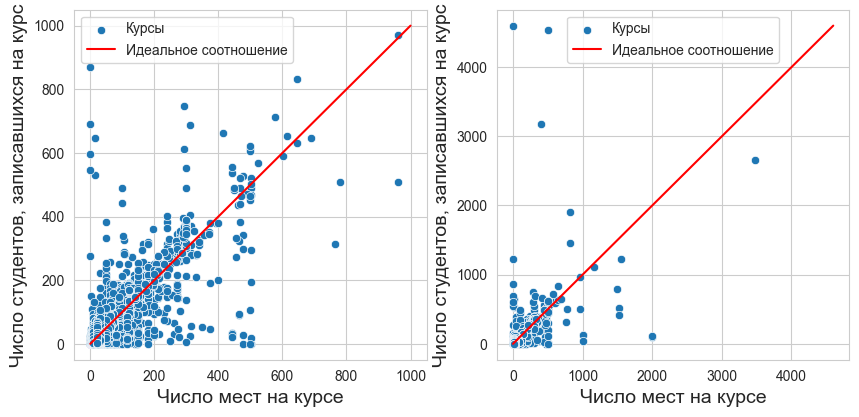

In [34]:
plt.figure(figsize=(10, 10))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
# plt.set_title("Ожидаемое и реальное число студентов для каждого курса", fontsize=15)

ax1 = plt.subplot(221)
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",label="Курсы")
plt.plot([0, 1000], [0, 1000], color="red", label="Идеальное соотношение")
plt.ylabel("Число студентов, записавшихся на курс", fontsize=14)
plt.xlabel("Число мест на курсе", fontsize=14)
plt.legend()

ax2 = plt.subplot(222)

sns.scatterplot(data=df,
                x="StudCount", y="StudLearnCount", label="Курсы")
plt.plot([0, 4600], [0, 4600], color="red", label="Идеальное соотношение")
# plt.title("Ожидаемое и реальное число студентов для каждого курса", fontsize=15)
plt.ylabel("Число студентов, записавшихся на курс", fontsize=14)
plt.xlabel("Число мест на курсе", fontsize=14)
plt.legend()

plt.show()

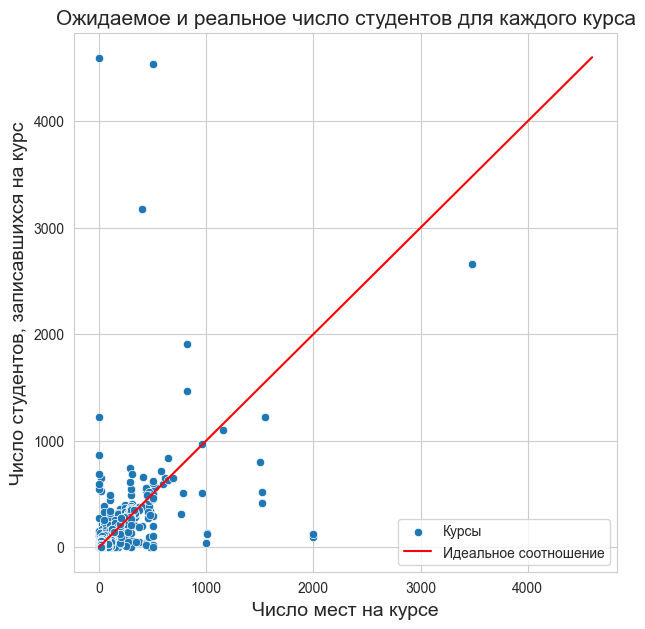

In [25]:
plt.figure(figsize=(7, 7))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(data=df,
                x="StudCount", y="StudLearnCount", label="Курсы")
plt.plot([0, 4600], [0, 4600], color="red", label="Идеальное соотношение")
plt.title("Ожидаемое и реальное число студентов для каждого курса", fontsize=15)
plt.ylabel("Число студентов, записавшихся на курс", fontsize=14)
plt.xlabel("Число мест на курсе", fontsize=14)
plt.legend()
plt.show()

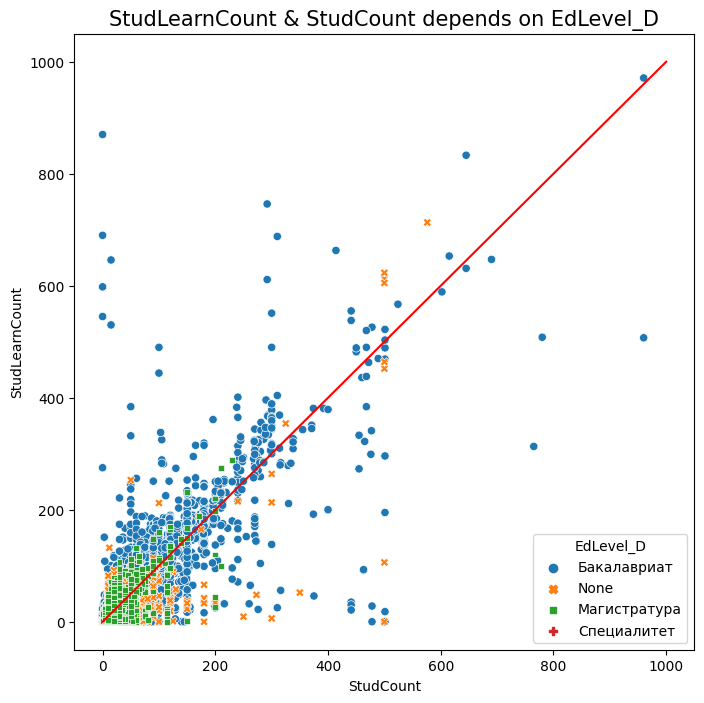

In [469]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="EdLevel_D", style="EdLevel_D")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on EdLevel_D", fontsize=15)
plt.show()

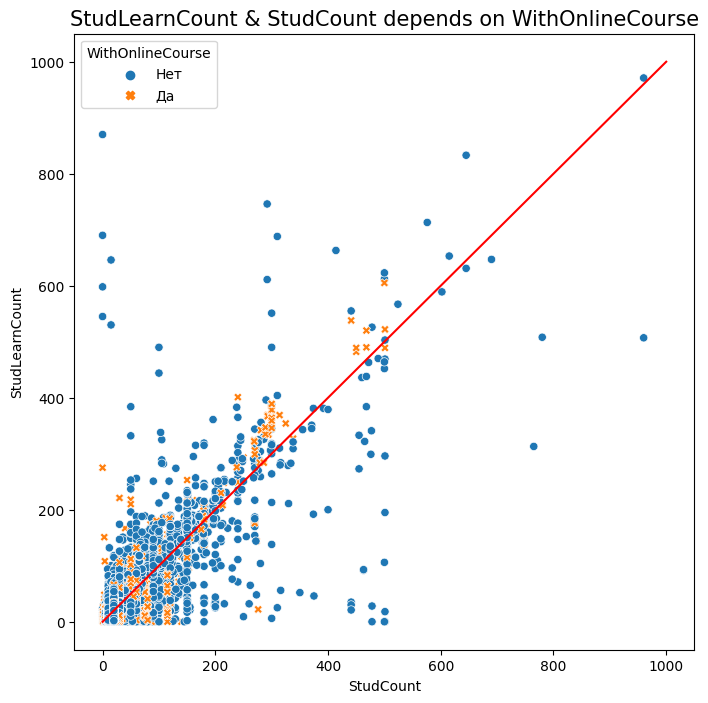

In [21]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(data=df[(df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000)],
                x="StudCount", y="StudLearnCount",
               hue="WithOnlineCourse", style="WithOnlineCourse")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on WithOnlineCourse", fontsize=15)
plt.show()

Давайте реализуем разделение на "тяжелые" курсы (т.е. выделим отдельную колонку с 1 если в курсе > 500 мест).

Точнее, просто разобьем на корзины (скажем 5 штук).

In [54]:
df["StudCountBins"] = np.log1p(df["StudCount"])

In [55]:
df = df.astype({"StudCountBins": 'int'})

In [494]:
df

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline,Diff,StudCountBins
0,2841075702,2865810374,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,33,33,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,-3,3
1,2841080394,2865810719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,0,3
2,2841083512,2865811719,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,29,29,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,1,3
3,2841086181,2865811996,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,31,31,0,...,3,114,18,20,0,1,Нет,2019/2020 учебный год,-1,3
4,2841143136,2865843661,Объединенный учебный план,Бакалавриат,Бакалавриат 4 курс,2019/2020 учебный год,30,30,30,0,...,3,114,18,20,0,3,Нет,2019/2020 учебный год,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20868,4502475287,4466805473,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,7,0,7,...,6,228,38,38,0,"3, 4",Нет,2021/2022 учебный год,13,3
20869,4504446723,4449156989,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,29,0,29,...,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год,-9,3
20870,4504447639,4449156466,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,20,0,20,...,6,228,60,30,0,"1, 2",Нет,2021/2022 учебный год,0,3
20871,4505861343,4505861336,Объединенный учебный план,Магистратура,Магистратура 1 курс,2021/2022 учебный год,20,1,0,1,...,3,114,20,20,0,3,Нет,2021/2022 учебный год,19,3


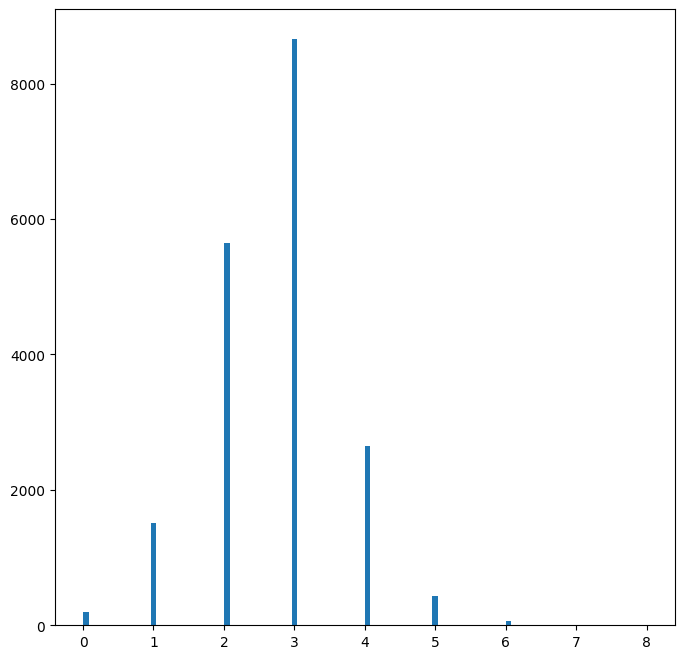

In [495]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
plt.hist(df["StudCountBins"], bins=100)
# plt.title("StudLearnCount & StudCount depends on WithOnlineCourse", fontsize=15)
plt.show()

In [ ]:
df["CrossStudCount"] = df["StudCount"] * df["StudCountBins"]

Посмотрим на EntireHours:

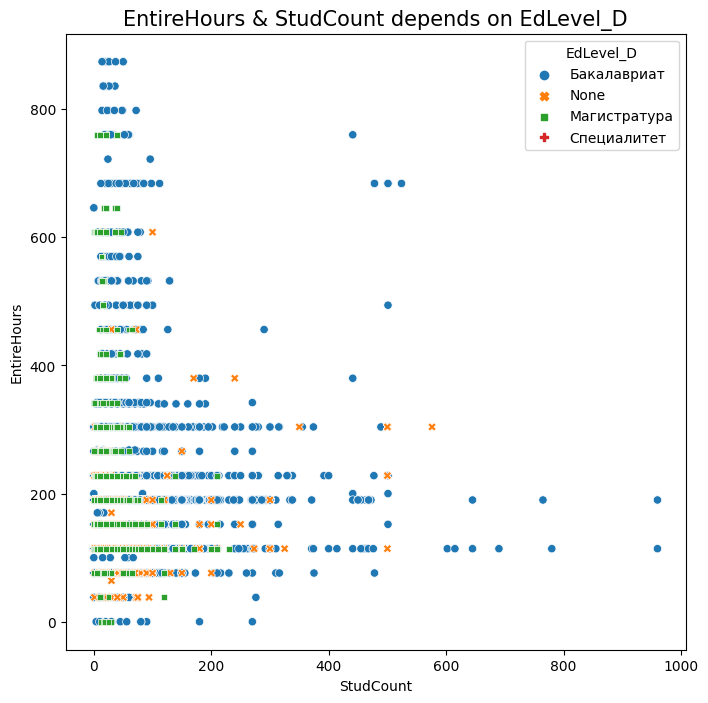

In [515]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.scatterplot(data=df[(df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000)],
                x="StudCount", y="EntireHours",
               hue="EdLevel_D", style="EdLevel_D")
# plt.plot([0, 1000], [0, 1000], color="red")
plt.title("EntireHours & StudCount depends on EdLevel_D", fontsize=15)
plt.show()

Для доработки:

* Идея - изменить метрику, сделать процент (x / y, где x - прдесказанное, y - истинное).

* Поработать с названиями курсов, наследственностью

* Возможно надо добавить новые парметры

* 


In [50]:
def part_error(y_test, y_pred):
    y_test[y_test == 0] = 1
    return (y_pred / y_test).mean()

Давайте попробуем посмотреть на название курсов:

In [16]:
df_discipline

,Description,LongName,SubjectClass_D,FacDepartment_D,FDFaculty_D,FDRegDepartment_D,ID,MasterItem,MasterItemPos,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D
0,Финансовые рынки,Финансовые рынки,Дисциплина,департамент политики и управления,факультет социальных наук,Москва,2852986397,2852986377,29986,Средства университета,None,3,114,0,0,0,"1, 2",Да,2019/2020 учебный год
1,Коррупция,Коррупция,Дисциплина,департамент политики и управления,факультет социальных наук,Москва,2852993892,2852993881,30776,Средства университета,None,3,114,0,0,0,"1, 2",Да,2019/2020 учебный год
2,Структура правительства,Структура правительства,Дисциплина,департамент политики и управления,факультет социальных наук,Москва,2853006376,2853006364,32044,Средства университета,None,3,114,0,0,0,"1, 2",Да,2019/2020 учебный год
3,Федерализм и децентрализация: оценивание дости...,Федерализм и децентрализация: оценивание дости...,Дисциплина,департамент политики и управления,факультет социальных наук,Москва,2853011187,2853011154,32700,Средства университета,None,3,114,0,0,0,"1, 2",Да,2019/2020 учебный год
4,Инновации в фармацевтике и медицинской технике,Инновации в фармацевтике и медицинской технике,Дисциплина,департамент политики и управления,факультет социальных наук,Москва,2844759305,2844759287,53716,Средства университета,None,3,114,0,0,0,1,Да,2019/2020 учебный год
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17967,Иностранный язык (немецкий),Иностранный язык (немецкий),Дисциплина,факультет мировой экономики и мировой политики,факультет мировой экономики и мировой политики,Москва,3860465052,3860464950,134530,Средства образовательной программы,для своего кампуса,6,228,0,0,200,"1, 2, 3, 4",Нет,2020/2021 учебный год
17968,Иностранный язык (итальянский),Иностранный язык (итальянский),Дисциплина,факультет мировой экономики и мировой политики,факультет мировой экономики и мировой политики,Москва,3860461824,3860461741,134450,Средства образовательной программы,для своего кампуса,6,228,0,0,200,"1, 2, 3, 4",Нет,2020/2021 учебный год
17969,Иностранный язык (испанский),Иностранный язык (испанский),Дисциплина,факультет мировой экономики и мировой политики,факультет мировой экономики и мировой политики,Москва,3862229604,3860463357,134547,Средства образовательной программы,для своего кампуса,7,266,0,0,232,"1, 2, 3, 4",Нет,2021/2022 учебный год
17970,Иностранный язык (итальянский),Иностранный язык (итальянский),Дисциплина,факультет мировой экономики и мировой политики,факультет мировой экономики и мировой политики,Москва,3862229581,3860461741,134450,Средства образовательной программы,для своего кампуса,7,266,0,0,232,"1, 2, 3, 4",Нет,2021/2022 учебный год


In [18]:
courses = df_discipline["Description"].unique()

In [22]:
courses.sort()

Посмотреть-проверить:

* Digital маркетинг / Digital-маркетинг

* ERP - системы / ERP-системы (SAP, 1C)

* UX-дизайн / UX/UI дизайн

* Алгоритмы в теории графов / Алгоритмы графов / Алгоритмы на графах

* Анализ временных рядов и панельные данные / Анализ временных рядов и панельных данных

* Анализ и совершенствование бизнес процессов / Анализ и совершенствование бизнес-процессов

* Анализ финансовой oтчетности / Анализ финансовой отчетности

* Вот эти штуки отличаются?

Английский язык для общих коммуникативных целей. Продвинутый курс

Английский язык для общих коммуникативных целей. Продвинутый курс - 1

Английский язык для общих коммуникативных целей. Продвинутый курс - 2

Английский язык для общих коммуникативных целей. Продвинутый курс - 3

Английский язык для общих коммуникативных целей. Продвинутый курс -1

Английский язык для общих коммуникативных целей. Продвинутый курс -2

* Продолжение:

Английский язык для специальных целей. История - 1

Английский язык для специальных целей. История - 2

Английский язык для специальных целей. История - 3

Английский язык для специальных целей. История – 1

Английский язык для специальных целей. История – 2
 
* Банковское дело / Банковское дело 1

* Бизнес-психологические технологии развития организаций / Бизнес-психологические технологии развития организаций: диагностика, фасилитация, интеграция

* Введение в финансовую теoрию риска / Введение в финансовую теорию риска

* Веб паблишинг 1
Веб прототипирование 1
Веб-паблишинг
Веб-программирование

* Верования в существование души: причины и последствия / Верованья в существования души: причины и последствия

* Второй иностранный (немецкий)
Второй иностранный язык (немецкий)
Второй иностранный язык (немецкий) 1 курс
Второй иностранный язык (немецкий) 2 курс

* Дисциплинa из другой образовательной программы
Дисциплина из другой магистерской программы
Дисциплина из другой образовательной прогpаммы

* Ивент менеджмент
Ивент продакшн менеджмент
Ивент-менеджмент

* Интернет-гиганты: юридическая и экономическая подоплека медийных платформ
Интернет-гиганты: юридическая и экономическая подоплёка медийных платформ
Интернет-гиганты:юридическая и экономическая подоплёка медийных платформ

* История литературы Испании и Латинской Америки, часть 1
История литературы Испании и Латинской Америки, часть 2
История литературы Испании и Латинской Америки. Часть 1
История литературы Испании и Латинской Америки. Часть 2

* Компиляторные технологии
Компиляторные технологии

* Международный B2B маркетинг
Международный B2B-маркетинг
Международный В2В-маркетинг

* Научно-исследовательский семинар "Нейроинформатика"
Научно-исследовательский семинар "Нейроинформатика”

* Параллельные и распределенные вычисления
Параллельные и распределённые вычисления

* Политические проекты XX в.
Политические проекты XX века
Политические проекты ХХ века

* Развитие "мягких навыков"
Развитие «мягких» навыков

* Распределенные системы
Распределённые системы

* Современный GR: как все работает на практике
Современный GR:как все работает на практике

* Теоретико-методологические проблемы качественных политических исследований
Теоретико-методологические проблемы качественных политических исследований.

* 
Теоретическая инфоpматика
Теоретическая информатика

* 
Технологии дизайна. Базовый уровень 1
Технологии дизайна. Базовый уровень1

* 

In [28]:
prev = "..."
for i in courses:
    j = i.strip()
    if j == prev:
        print(prev, j)
    prev = j

In [29]:
s1 = "Теоретическая инфоpматика"
s2 = "Теоретическая информатика"

In [31]:
for i in range(len(s1)):
    if s1[i] != s2[i]:
        print(i)

18


In [35]:
len(df["Description"].unique())

7087

Поработаем еще с данными, посмотрим на PeriodNumList:

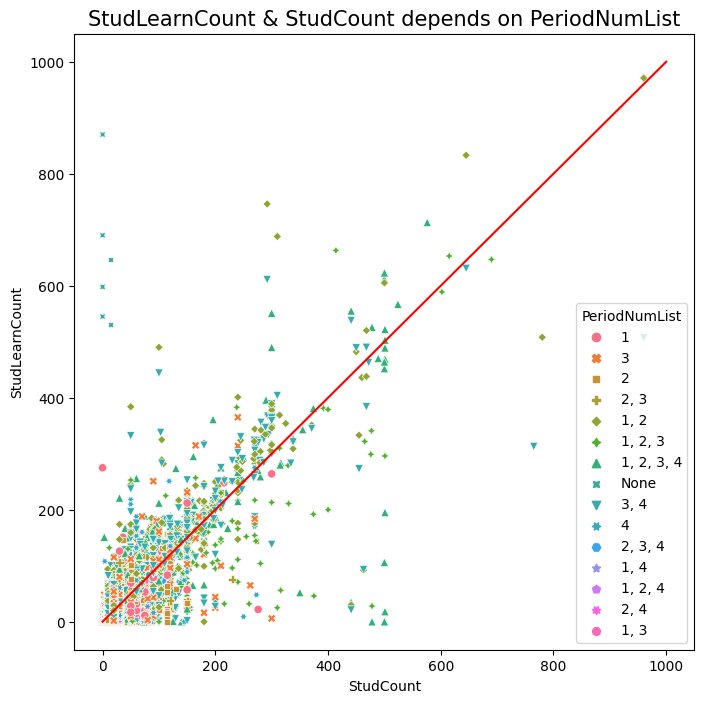

In [57]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="PeriodNumList", style="PeriodNumList")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on PeriodNumList", fontsize=15)
plt.show()

Явно ошибка какая-то df[df["PeriodNumList"] == "1, 2, 2"] (вроде там должно быть 1, 2)

In [27]:
df[df["PeriodNumList"] == "1, 2, 2"]

,ID,ProposalItem,PlanClass_D,EdLevel_D,ItemCourse_D,ItemLearnYear_D,StudCount,StudLearnCount,BachStudCount,MagStudCount,...,ItemSource_D,AudienceScope_D,Credits,EntireHours,LectionHours,SeminarHours,PracticeHours,PeriodNumList,WithOnlineCourse,ItemLearnYear_D_discipline
5094,2840705867,4291908745,Объединенный учебный план,Бакалавриат,Бакалавриат 2 курс,2020/2021 учебный год,24,22,22,0,...,Средства образовательной программы,None,3,114,10,10,0,"1, 2, 2",Нет,2020/2021 учебный год


In [32]:
df.groupby(by=["PeriodNumList"]).count()[["ID"]]

,ID
PeriodNumList,
1,1593
"1, 2",4354
"1, 2, 2",1
"1, 2, 3",1235
"1, 2, 3, 4",1717
"1, 2, 4",5
"1, 3",5
"1, 4",4
2,1596


In [38]:
df.loc[df["PeriodNumList"] == "1, 2, 2", "PeriodNumList"] = "1, 2"

Пофиксила.

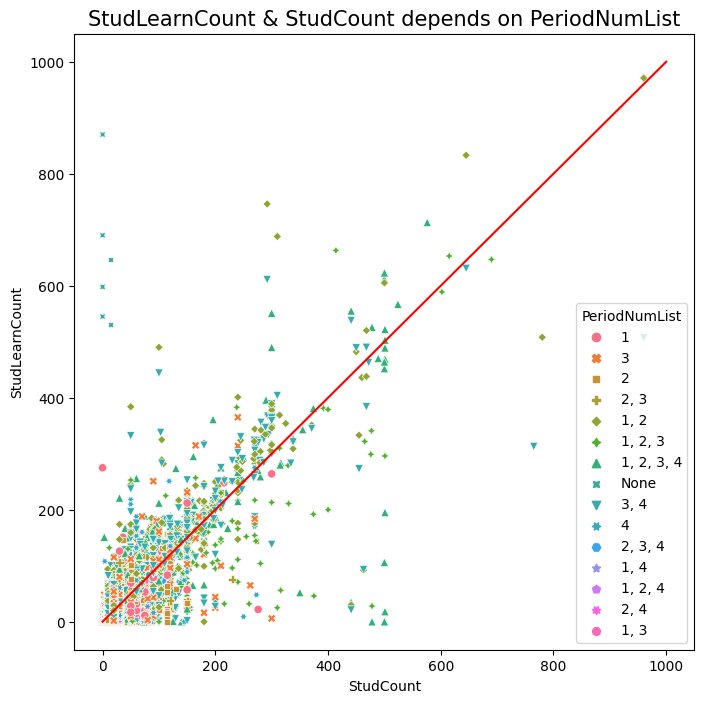

In [56]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 1000) & (df["StudCount"] < 1000))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="PeriodNumList", style="PeriodNumList")
plt.plot([0, 1000], [0, 1000], color="red")
plt.title("StudLearnCount & StudCount depends on PeriodNumList", fontsize=15)
plt.show()

In [52]:
df.groupby(by=["SubjectClass_D"]).count()[["ID"]]

,ID
SubjectClass_D,
Дисциплина,17532
Научно-исследовательский семинар,1615


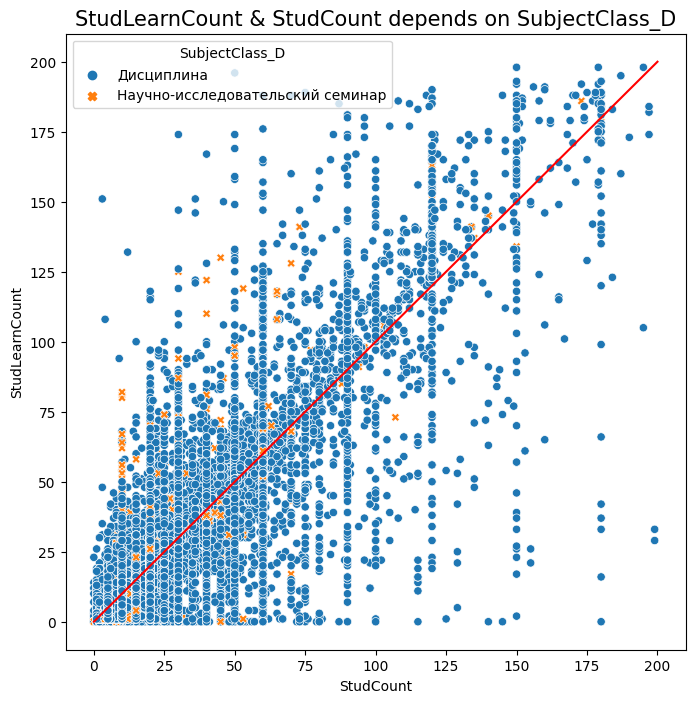

In [55]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["StudLearnCount"] < 200) & (df["StudCount"] < 200))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="StudLearnCount",
               hue="SubjectClass_D", style="SubjectClass_D")
plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on SubjectClass_D", fontsize=15)
plt.show()

Чек-лист графиков, которые уже есть:

| колонка | да/нет | число уникальных  |
|---|---|---|
| ID   |  - |  19147 |
| ProposalItem  |  - | 16826  |
| PlanClass_D  |   | 4  |
| EdLevel_D | + | 4|
| ItemCourse_D | | 10 |
| ItemLearnYear_D | | 3 |
| StudCount             |-|          269 |
| StudLearnCount          |-|       375 |
| BachStudCount        | |          372 |
| MagStudCount           ||         127 |
| RegDepartment_D          ||         5 |
| Faculty_D                  ||      52 |
| LearnProgram_D      ||            295 |
| Description         ||           7087 |
| LongName            ||           7089 |
| SubjectClass_D      |+|              2 |
| FacDepartment_D     ||            210 |
| FDFaculty_D         ||             53 |
| FDRegDepartment_D     ||            4 |
| MasterItem              |-|      16170 |
| MasterItemPos             |-|    16164 |
| ItemSource_D                ||      4 |
| AudienceScope_D               ||    4 |
| Credits                       ||   24 |
| EntireHours      ||                30 |
| LectionHours       ||              59 |
| SeminarHours         ||            73 |
| PracticeHours          ||         113 |
| PeriodNumList            |+|        15 |
| WithOnlineCourse           |+|       2 |

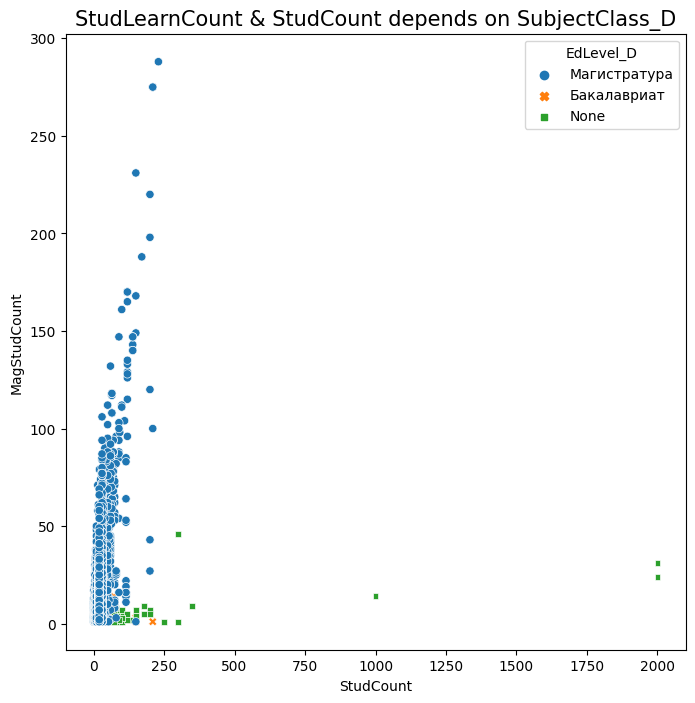

In [62]:
plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
cond1 = ((df["MagStudCount"] > 0))
sns.scatterplot(data=df[cond1],
                x="StudCount", y="MagStudCount",
               hue="EdLevel_D", style="EdLevel_D")
# plt.plot([0, 200], [0, 200], color="red")
plt.title("StudLearnCount & StudCount depends on SubjectClass_D", fontsize=15)
plt.show()

In [64]:
df[(df["MagStudCount"] > 0) & (df["StudCount"] > 1500)]["Description"]

14534    Стартап-школа Бизнес-инкубатора НИУ ВШЭ
14594                      Стартап-школа НИУ ВШЭ
Name: Description, dtype: object

In [66]:
df["ItemLearnYear_D"].unique()

array(['2019/2020 учебный год', '2020/2021 учебный год',
       '2021/2022 учебный год'], dtype=object)